## US Visa Prediction Project

**Life cycle of Machine learning Project**
- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

### About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

### 1. Problem statement.

- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

- This model is to check if Visa get approved or not based on the given dataset.
- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

### 2. Data Collection.

- The Dataset is part of Office of Foreign Labor Certification (OFLC)
- The data consists of 25480 Rows and 12 Columns

`Dataset Link` - https://www.kaggle.com/datasets/moro23/easyvisa-dataset

#### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Import the CSV data into a Pandas DataFrame.**

In [2]:
df = pd.read_csv(r'Visadataset.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Shape of the dataset**

In [3]:
df.shape

(25480, 12)

**Statistical summary of dataframe**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Check Datatypes in the dataset**

In [5]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### 3. EXPLORING DATASET

In [6]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

**Some meaningful insights:**

1. **Continent Representation**:
    - **Asia** leads with **66.17%**, suggesting a significant portion of employees are from Asia.
    - **Europe** and **North America** follow with **14.65%** and **12.92%** respectively, indicating these regions have moderate representation.
    - **South America** and **Africa** are less represented with **3.34%** and **2.16%**.
    - **Oceania** is the least represented at **0.75%**.

2. **Education Level**:
    - A large proportion of employees hold a **Bachelor's degree (40.16%)** and **Master's degree (37.81%)**.
    - A smaller fraction have a **High School education (13.42%)** and **Doctorate (8.60%)**.

3. **Job Experience**:
    - **58.09%** of employees have job experience, while **41.91%** do not, indicating a slightly higher preference for experienced individuals.

4. **Job Training Requirement**:
    - A vast majority of positions **(88.40%)** do not require job training, while **11.60%** do, suggesting that most roles might prioritize skills and qualifications over training.

5. **Region of Employment**:
    - **Northeast (28.24%)**, **South (27.54%)**, and **West (25.85%)** are the top regions of employment.
    - **Midwest** holds **16.90%**, and **Island regions** have **1.47%**, reflecting where employment is concentrated.

6. **Unit of Wage**:
    - Most wages are provided on a **yearly basis (90.12%)**, followed by **hourly (8.47%)**, **weekly (1.07%)**, and **monthly (0.35%)** rates.

7. **Full-Time Position**:
    - An overwhelming majority of positions **(89.38%)** are full-time, with only **10.62%** being part-time.

8. **Case Status**:
    - **66.79%** of cases are **certified**, while **33.21%** are **denied**, indicating a majority of applications are successful.

**Summary**:
This data suggests that most employees come from Asia, hold a Bachelor's or Master's degree, have job experience, and do not require additional job training. Employment is predominantly in the Northeast, South, and West regions, with wages mostly given on a yearly basis and full-time positions being the norm. Additionally, the majority of cases are certified, indicating a high success rate for applications.

### Univariate Analysis
- The analysis of a single variable is referred to as `Univariate Analysis`. The word "uni" signifies "one." Understanding the distribution of values for a single variable is the aim of univariate analysis.

**Other Type of Analysis are:**

- **Bivariate Analysis:** The analysis of two variables.
- **Multivariate Analysis:** The analysis of two or more variables.


**Numerical Features**

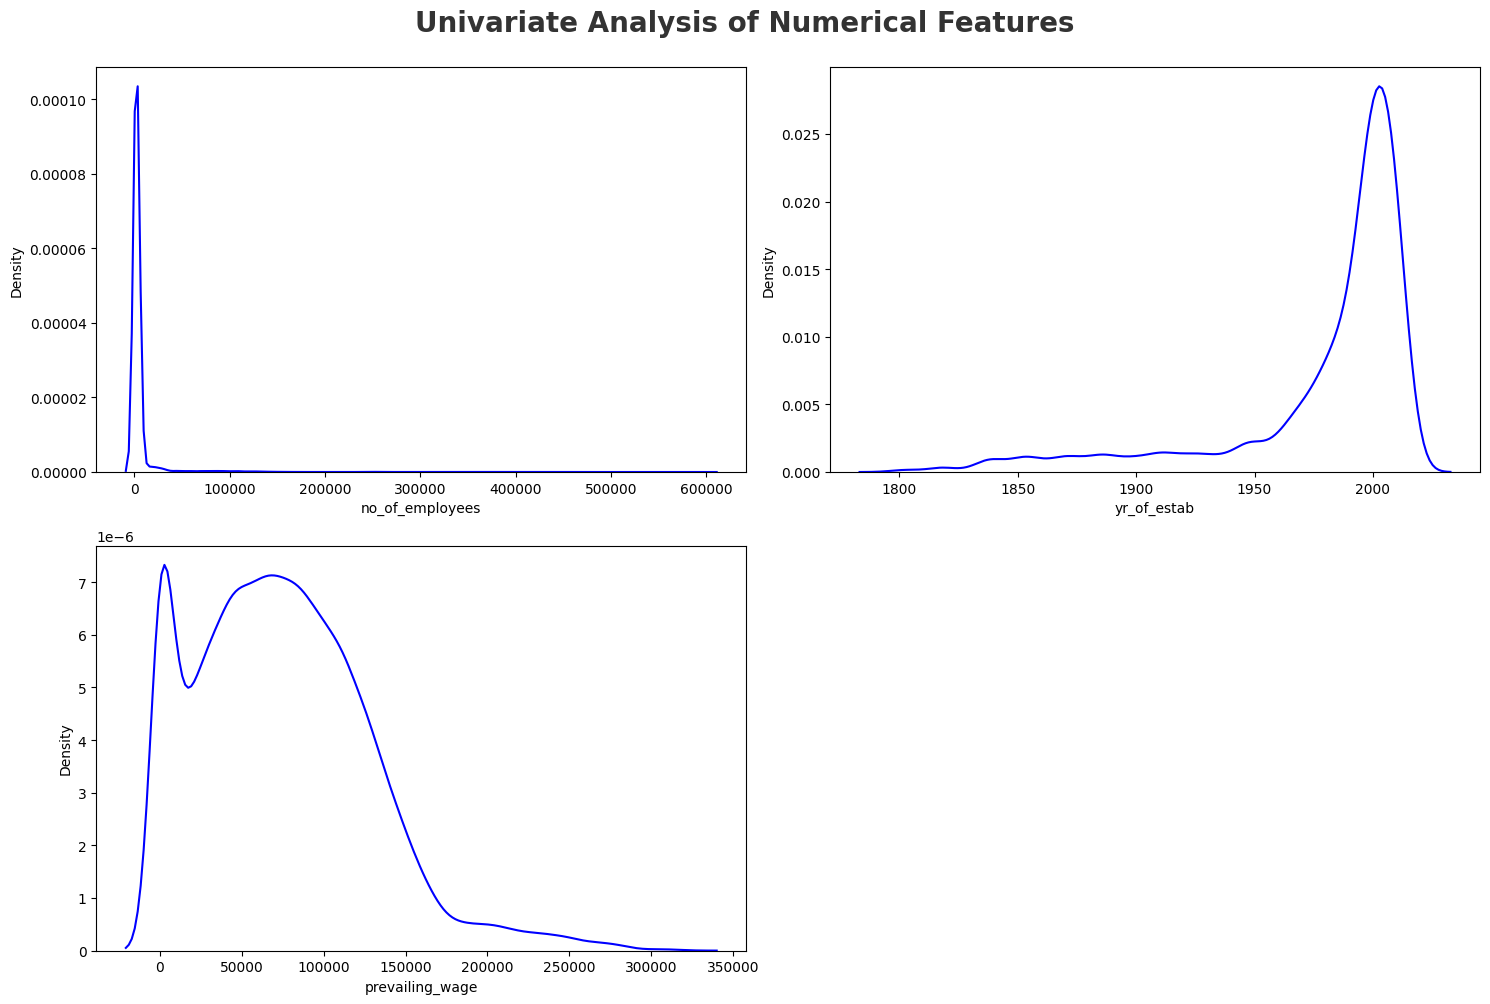

In [8]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

### **Univariate Analysis of Numerical Features**

1. **Number of Employees (no_of_employees)**:
   - The density distribution is highest near zero and decreases rapidly as the number of employees increases, with a long tail extending towards higher values.
   - **Insight**: This indicates that most companies have fewer employees, but there are a few companies with a significantly larger number of employees.

2. **Year of Establishment (yr_of_estab)**:
   - The density is relatively low and stable from the year 1800 to around 1950, after which it increases sharply, peaking around the year 2000.
   - **Insight**: The sharp increase after 1950 suggests a boom in company establishments, peaking around the turn of the millennium. This could correlate with global economic growth and industrialization phases.

3. **Prevailing Wage (prevailing_wage)**:
   - The density has a peak at a lower wage value, then decreases, rises again to form a second peak, and finally decreases steadily towards higher wage values.
   - **Insight**: This bimodal distribution indicates there are two common wage ranges—possibly reflecting a split between lower-wage and higher-wage jobs, perhaps delineating different industry sectors or job roles.

### **Summary**:
- **Number of Employees**: Most companies are small, but some are very large.
- **Year of Establishment**: A significant increase in the number of companies established after 1950, peaking around 2000.
- **Prevailing Wage**: Two common wage ranges suggest a diverse job market with distinct lower and higher-paying sectors.

**Categorical Features**

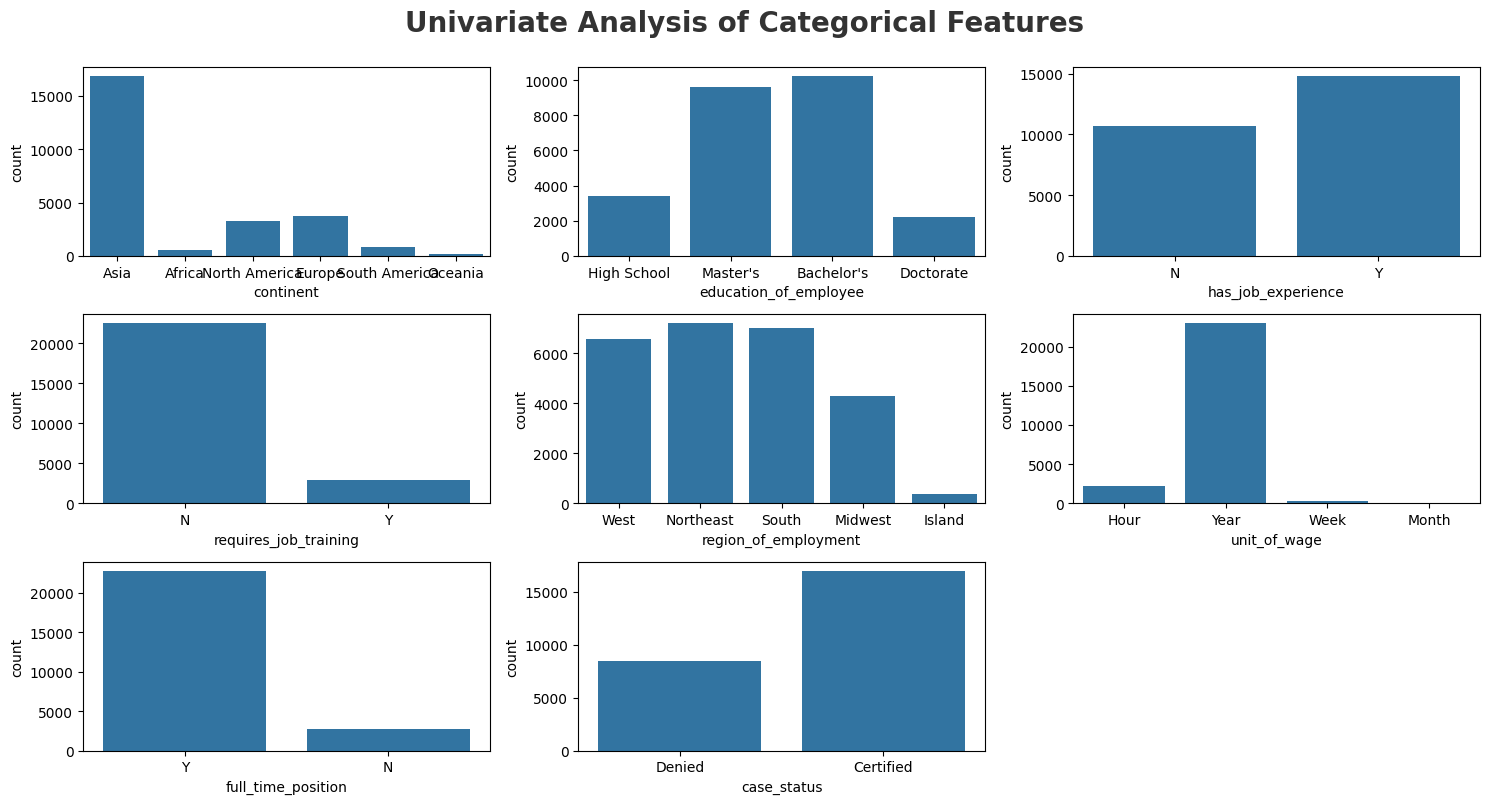

In [9]:
# categorical columns
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

### **Continent Representation**:
- **Asia** leads with **66.17%**, indicating a significant portion of employees are from Asia.
- **Europe** follows with **14.65%** and **North America** with **12.92%**, suggesting moderate representation from these regions.
- **South America** has **3.34%**, **Africa** **2.16%**, and **Oceania** is the least represented with **0.75%**.

### **Education Level**:
- **Bachelor's degree** is the most common at **40.16%**.
- **Master's degree** follows closely at **37.81%**.
- **High School education** accounts for **13.42%**.
- **Doctorate** holders make up **8.60%**.

### **Job Experience**:
- **58.09%** of employees have job experience.
- **41.91%** do not have job experience, indicating a slightly higher preference for experienced individuals.

### **Job Training Requirement**:
- A vast majority **(88.40%)** of positions do not require job training.
- **11.60%** of positions require job training, suggesting that most roles prioritize skills and qualifications over training.

### **Region of Employment**:
- The **Northeast** region leads with **28.24%**.
- The **South** region follows closely with **27.54%**.
- The **West** region has **25.85%**.
- The **Midwest** region holds **16.90%**.
- **Island regions** have the lowest representation at **1.47%**.

### **Unit of Wage**:
- **Yearly** wages are the most common at **90.12%**.
- **Hourly** wages account for **8.47%**.
- **Weekly** wages make up **1.07%**.
- **Monthly** wages are the least common at **0.35%**.

### **Full-Time Position**:
- An overwhelming majority **(89.38%)** of positions are full-time.
- Only **10.62%** are part-time positions.

### **Case Status**:
- **66.79%** of cases are certified.
- **33.21%** of cases are denied, indicating that a majority of applications are successful.

---

### **Summary**:
This data indicates that most employees are from Asia, hold a Bachelor's or Master's degree, have job experience, and do not require additional job training. Employment is predominantly in the Northeast, South, and West regions, with wages mostly provided on a yearly basis and full-time positions being the norm. The majority of cases are certified, indicating a high success rate for applications.

**Multivariate Analysis**
- Multivariate analysis is the analysis of more than one variable.

In [10]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


**Check Multicollinearity in Numerical features**

In [11]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Insights**

- There is no multicollinearity between any variables

**Check Multicollinearity for Categorical features**
- A chi-squared test (also chi-square or $X^2$ test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test.
- A chi-square statistic is one way to show a relationship between two categorical variables.
- Here we test correlation of Categorical columns with Target column i.e case_status

**Null Hypothesis ($H_0$):** The Feature is independent of target column (No-Correlation)

**Alternative Hypothesis ($H_1$):** The Feature and Target column are not independent (Correalted)



In [12]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**Report:**

- Here `requires_job_training` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

**Checking Null Values**

In [13]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [14]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


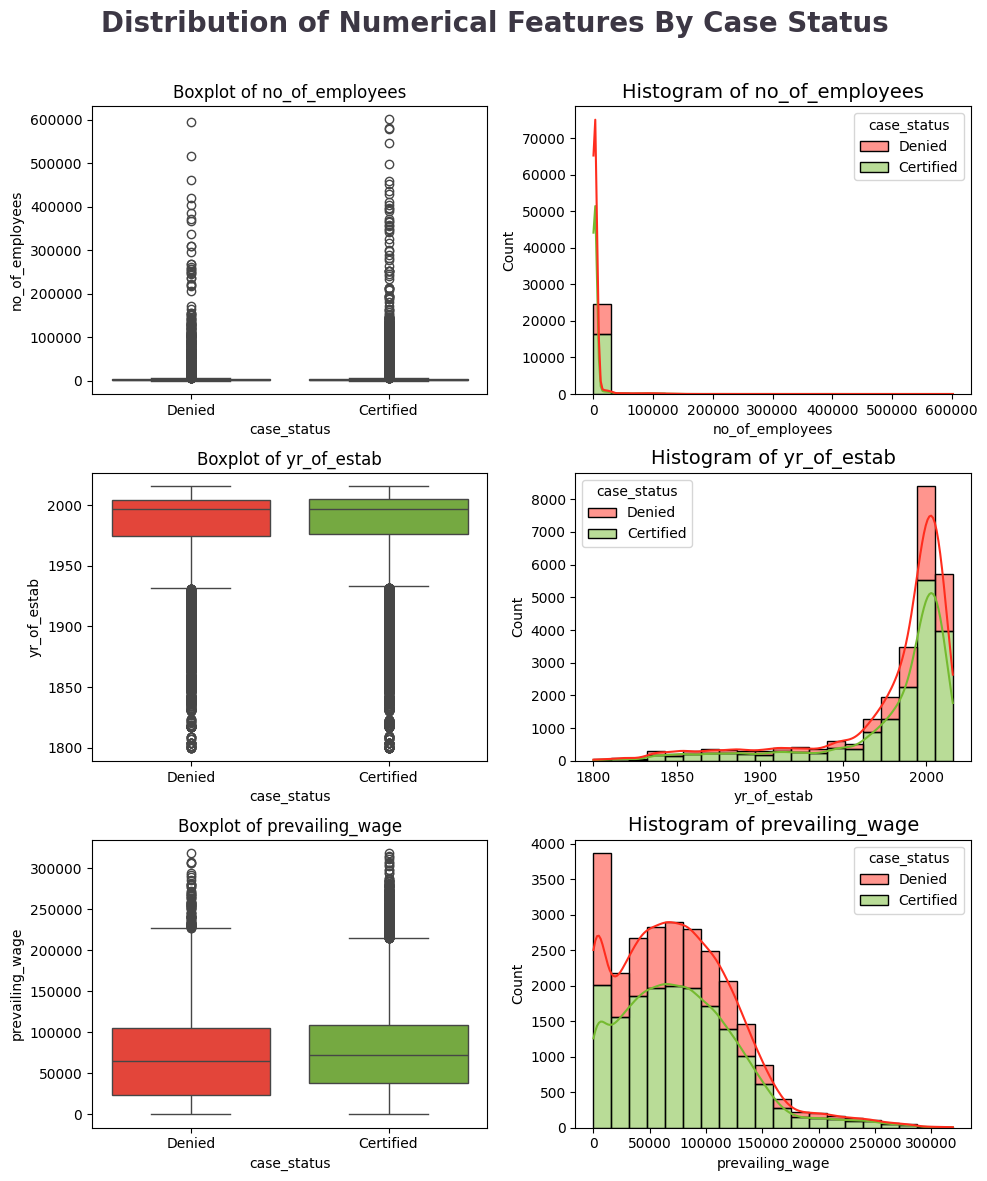

In [15]:
clr1 = ['#ff2d1e', '#75ba30']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

**Some key insights:**

1. **Boxplot of Number of Employees (no_of_employees)**: Shows the distribution of the number of employees for denied and certified cases. Both categories have a large number of outliers, with the bulk of the data concentrated at lower values.

2. **Histogram of Number of Employees (no_of_employees)**: Displays the distribution of the number of employees for denied and certified cases. Most of the data is concentrated at lower values, with a long tail extending to higher values.

3. **Boxplot of Year of Establishment (yr_of_estab)**: Depicts the distribution of the year of establishment for denied and certified cases. Both categories have similar distributions, with most data points concentrated around the mid-1900s to early 2000s.

4. **Histogram of Year of Establishment (yr_of_estab)**: Shows the distribution of the year of establishment for denied and certified cases. The data shows a peak around the late 1900s to early 2000s.

5. **Boxplot of Prevailing Wage (prevailing_wage)**: Displays the distribution of the prevailing wage for denied and certified cases. Both categories have a large number of outliers, with the bulk of the data concentrated at lower values.

6. **Histogram of Prevailing Wage (prevailing_wage)**: Shows the distribution of the prevailing wage for denied and certified cases. The data shows a peak at lower wage values, with a long tail extending to higher values.

### Insights:

1. **Number of Employees**: Both denied and certified cases show a concentration of companies with fewer employees, but there are some large companies, as indicated by the long tail and outliers.

2. **Year of Establishment**: Most companies were established around the mid-1900s to early 2000s, indicating a period of significant growth and establishment of companies during this timeframe.

3. **Prevailing Wage**: The prevailing wage has a bimodal distribution, suggesting two common wage ranges, possibly reflecting different job roles or industry sectors.


### 4. Visualization

**4.1 Visualize the Target Feature**

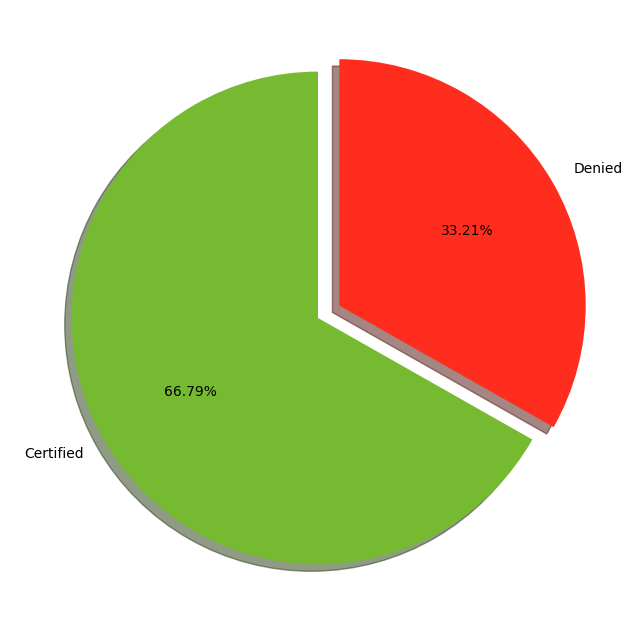

In [16]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#75ba30','#ff2d1e']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

- **Certified**: Representing **66.79%**.
- **Denied**: Representing **33.21%**.

This visual representation highlights the success rate of applications, with a significant majority (over two-thirds) being certified. This insight suggests a high approval rate for applications overall.

**4.2 Does applicant Continent has any impact on Visa status?**

In [17]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

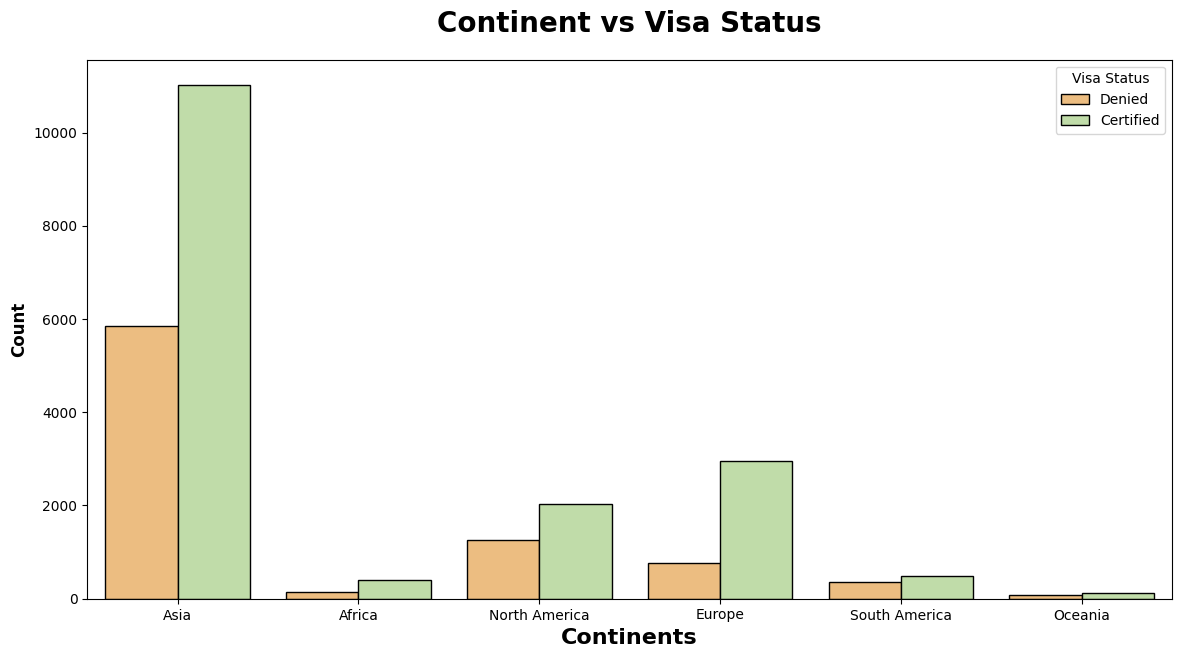

In [18]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Spectral")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [19]:
df2 = df.copy()

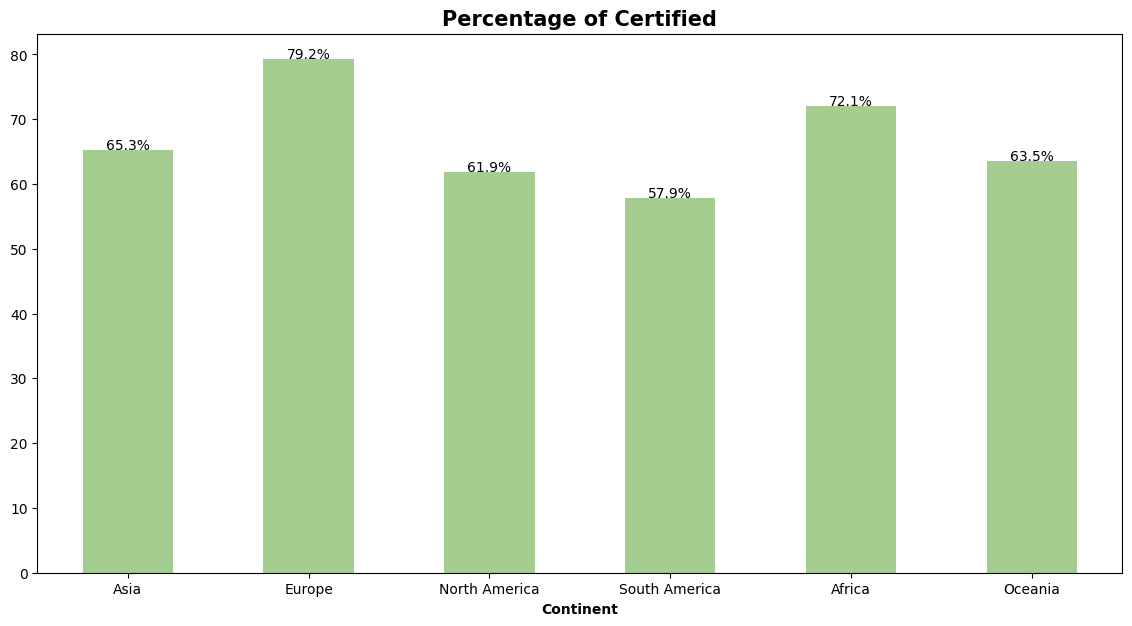

In [21]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='crest')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### **Percentage of Certified Individuals Across Continents**

- **Asia**: 65.3%
- **Europe**: 79.2%
- **North America**: 61.9%
- **South America**: 57.9%
- **Africa**: 72.1%
- **Oceania**: 63.5%

### **Insights**:

1. **Europe** has the highest percentage of certified individuals at **79.2%**, suggesting a favorable environment for certifications in this continent.
2. **Africa** follows with **72.1%**, indicating a significant proportion of certified individuals.
3. **Asia** and **Oceania** have similar certification rates, both in the **60s percentile**.
4. **North America** has a slightly lower certification rate compared to Asia and Oceania.
5. **South America** has the lowest certification rate at **57.9%**, indicating potential challenges in achieving certifications.

### **Summary**:
The data indicates varying certification rates across continents, with Europe leading and South America trailing. These insights could inform strategies for improving certification rates in underperforming regions or highlight successful practices in high-performing areas.


**4.3 Does applicant education has any impact on Visa status?**